<a href="https://colab.research.google.com/github/motabor153/team1A-dtsc-3601-project/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Load Data
df_summer = pd.read_csv("summer.csv")
df_winter = pd.read_csv("winter.csv")
df_dictionary = pd.read_csv("dictionary.csv")


# Concatenate the dataframes
df = pd.concat([df_summer, df_winter, df_dictionary], ignore_index=True)

# Quick peek
display(df.head())
display(df.info())
display(df.describe())

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Code,Population,GDP per Capita
0,1896.0,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,NaN,NaN,NaN
1,1896.0,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,NaN,NaN,NaN
2,1896.0,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,NaN,NaN,NaN
3,1896.0,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,NaN,NaN,NaN
4,1896.0,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37136 entries, 0 to 37135
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            36935 non-null  float64
 1   City            36935 non-null  object 
 2   Sport           36935 non-null  object 
 3   Discipline      36935 non-null  object 
 4   Athlete         36935 non-null  object 
 5   Country         37132 non-null  object 
 6   Gender          36935 non-null  object 
 7   Event           36935 non-null  object 
 8   Medal           36935 non-null  object 
 9   Code            201 non-null    object 
 10  Population      196 non-null    float64
 11  GDP per Capita  176 non-null    float64
dtypes: float64(3), object(9)
memory usage: 3.4+ MB


None

,Year,Population,GDP per Capita
count,36935.000000,1.960000e+02,176.000000
mean,1972.961635,3.722825e+07,12882.556131
std,32.447833,1.399655e+08,17747.141203
min,1896.000000,1.022200e+04,277.068309
25%,1952.000000,1.638278e+06,1781.096847
50%,1980.000000,7.450124e+06,5233.583395
75%,2000.000000,2.557454e+07,15494.683646
max,2014.000000,1.371220e+09,101449.968168


In [ ]:
# Handle missing values
df['Medal'] = df['Medal'].fillna("None")

# Standardize column names (if needed)
df.rename(columns={'Sex': 'Gender'}, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Code,Population,GDP per Capita
0,1896.0,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,NaN,NaN,NaN
1,1896.0,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,NaN,NaN,NaN
2,1896.0,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,NaN,NaN,NaN
3,1896.0,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,NaN,NaN,NaN
4,1896.0,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,NaN,NaN,NaN


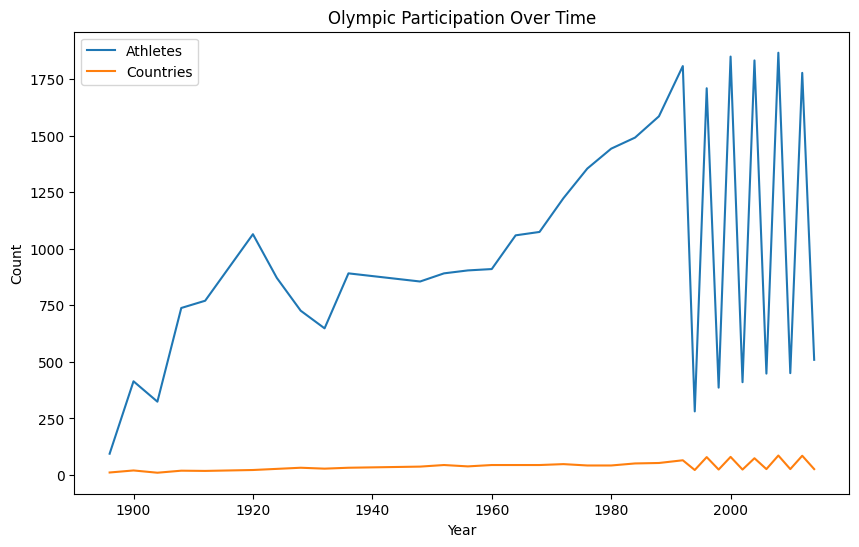

In [ ]:
athletes_per_year = df.groupby("Year")["Athlete"].nunique()
countries_per_year = df.groupby("Year")["Country"].nunique()

plt.figure(figsize=(10,6))
plt.plot(athletes_per_year.index, athletes_per_year.values, label="Athletes")
plt.plot(countries_per_year.index, countries_per_year.values, label="Countries")
plt.title("Olympic Participation Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()

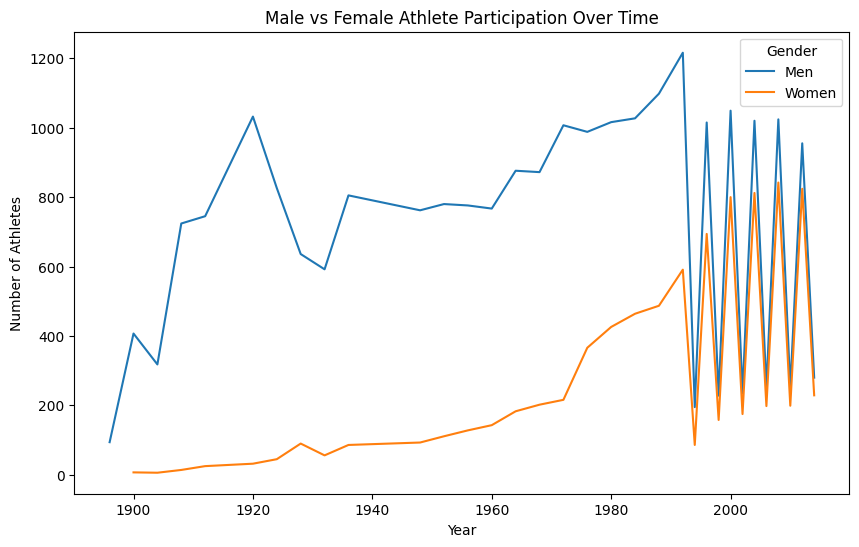

In [ ]:
gender_counts = df.groupby(["Year", "Gender"])["Athlete"].nunique().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=gender_counts, x="Year", y="Athlete", hue="Gender")
plt.title("Male vs Female Athlete Participation Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.show()

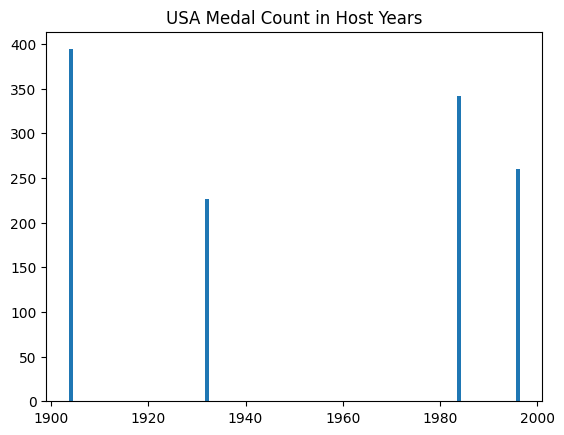

In [ ]:
host_medals = df.groupby(["Year", "Country"])["Medal"].count().reset_index()

usa_host = host_medals[(host_medals["Country"]=="USA") & (host_medals["Year"].isin([1904, 1932, 1984, 1996]))]

plt.bar(usa_host["Year"], usa_host["Medal"])
plt.title("USA Medal Count in Host Years")
plt.show()